# 第一階段，讀檔後做斷詞作業
# 斷詞後隨即去除標點符號和停字詞

In [1]:
import pandas as pd

dfMain = pd.read_csv('C:/Data/MainPost2.csv', encoding = 'utf-8')
dfDetail = pd.read_csv('C:/Data/DetailContent2.csv', encoding = 'utf-8')

In [2]:
#dfMain.columns
dfDetail.columns

Index(['﻿oID', 'PID', 'CIDX', 'Poster', 'Gender', 'CDate', 'Cmt', 'CLike',
       'Date', 'Time'],
      dtype='object')

In [3]:
#置換編碼問題造成符號  \ufeff
dfMain=dfMain.rename(columns = {'\ufeffPID':'PID'})
dfMain.loc[:5,["PID","Poster","Gender","Title","PDate","PCont",'PLike','PReply']]

dfDetail=dfDetail.rename(columns = {'\ufeffoID':'oID'})
dfDetail.loc[:5,["oID", 'PID', 'CIDX', 'Poster', 'Gender', 'CDate', 'Cmt', 'CLike','Date', 'Time']]

,oID,PID,CIDX,Poster,Gender,CDate,Cmt,CLike,Date,Time
0,226290629-1,226290629,1,臺北醫學大學,m,4月30日 04:36,匆匆四年過社團無成就成績也不行工作無著落,11,2017/4/30,04:36
1,226260030-1,226260030,1,臺北醫學大學,m,4月25日 11:40,和期中考成績單上的數字一樣耶！,27,2017/4/25,11:40
2,226260030-2,226260030,2,臺北醫學大學,m,4月25日 13:43,我是說在座的各位都是垃色,11,2017/4/25,13:43
3,226260030-3,226260030,3,一個把回應刪除的同學,o,4月25日 15:42,已經刪除的內容就像 Dcard 一樣，錯過是無法再相見的！,0,2017/4/25,15:42
4,226260030-4,226260030,4,臺北醫學大學,f,4月25日 23:34,校板終於變廢了嗎（#,10,2017/4/25,23:34
5,226260030-5,226260030,5,臺北醫學大學,f,4月26日 03:05,超廢欸哈哈哈哈哈哈,4,2017/4/26,03:05


# 處理標點符號與停字詞

In [4]:
import jieba, re
jieba.load_userdict("userdict.txt")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Kent\AppData\Local\Temp\jieba.cache
Loading model cost 1.041 seconds.
Prefix dict has been built succesfully.


In [6]:
tmp = open('C:/Data/PA-2/stopword_chinese.txt','r',encoding = 'utf-8')
stopword = list(tmp.read().split('\n'))
tmp.close()
tmp = open('C:/Data/PA-2/punctuation.txt','r',encoding = 'utf-8')
punctuation = list(tmp.read().split('\n'))
tmp.close()
#print(punctuation)
for i, val in enumerate(punctuation):
    if u'\ufeff' in val:
        t = val.split('.')
        punctuation[i] = '.'

#print(punctuation)    
RemovedWords = punctuation + stopword
RemovedWords.pop(-1)
print(RemovedWords)

['[', '.', '!', '/', '-', '>', '<', '$', '%', '^', '*', '(', '"', '?', ']', '|', '[', '—', '！', '，', '。', '？', '、', '（', '）', '：', '」', '「', ')', '(', '【', '】', '╱', '；', ']', '=', '「', '」', '‧', '（', '）', '.', '~', '', '的', '是', '一', '在', '有', '個', '我', '不', '這', '了', '他', '也', '就', '人', '都', '說', '而', '我們', '你', '要', '之', '會', '對', '及', '和', '與', '以', '很', '種', '中', '大', '能', '著', '她', '那', '上', '但', '年', '還', '可以', '時', '最', '自己', '為', '來', '所', '他們', '兩', '各', '可', '或', '好', '等', '又', '將', '後', '因為', '於', '由', '從', '更', '被', '才', '已', '者', '每', '次', '把', '三', '什麼', '其', '讓', '此', '做', '再', '所以', '只', '沒有', '則', '卻', '地', '並', '位', '得', '想', '去', '呢', '表示', '到', '如果', '为', '于', '后', '来', '因', '下', '这', '与', '并', '个', '无', '小', '们', '起', '今', '亦', '某', '乃', '它', '吧', '比', '别', '趁', '当', '从', '打', '凡', '儿', '尔', '该', '给', '跟', '何', '还', '即', '几', '既', '看', '据', '距', '靠', '啦', '另', '么', '嘛', '拿', '哪', '您', '凭', '且', '却', '让', '仍', '啥', '如', '若', '使', '谁', '虽', '随', '同', '哇', '嗡', '往', 

In [7]:
#for x in range(len(dfMain.index)):
#    print date_example['column'].iloc[x]

#print(dfMain.loc[0,["Title"]])
#for row in dfDetail.itertuples():
for index, row in dfMain.iterrows():
    title = ""
    #斷詞前先清除符號
    re.title = re.sub('[\W_]', '', row["Title"])    
    #做Title斷詞
    seg_list = jieba.cut(re.title, cut_all=False)
    
    for words in seg_list:
        if words not in RemovedWords:
            title += words.strip().lower() + " "
    #print(title.strip())
    dfMain.loc[index,["Title"]] = title.strip()
    
    #做Content斷詞
    content = ""
    ctnt = ""
    re.content = re.sub('[\W_]', '', row["PCont"])
    cont_list = jieba.cut(re.content, cut_all=False)
    
    for words in cont_list:
        if words not in RemovedWords:
            content += words.strip().lower() + " "
    #print(title.strip())
    dfMain.loc[index,["PCont"]] = content.strip()

In [8]:
dfMain.head()

,PID,Poster,Gender,Title,PDate,PCont,PLike,PReply
0,226290629,臺北醫學大學,m,大學 生活 如詩 如畫,2017/4/30,在讀 大學 歲月 裡或 四年 六年 或將 畢業 回味 或剛 入學 期待 這段 大學 時光 註...,6,1
1,226260030,臺北醫學大學,m,草莓,2017/4/25,番茄 蘋果 都是 紅色,22,9
2,226259854,臺北醫學大學,m,有沒有 學校 附近 房子 很雷的掛,2017/4/25,如題 最近 租房子 逛了 蠻多的 套房 有沒有 雖然 照片 看起來 還不錯 可是 實際上 有...,4,7
3,226259324,臺北醫學大學,m,停電 好口 怕 噢,2017/4/25,教研 上課 上到 一半 全黑 qq 以下 開放 還有 哪裡 災情,4,8
4,226248081,臺北醫學大學,f,關於 北醫 附近 租屋,2017/4/23,弱弱 地想 請教 一下 不知道 台北市 租房 一次 付清 一年 房租 然後 減 一個月 房租...,5,7


In [9]:
#dfDetail.loc[:5,["oID", 'PID', 'CIDX', 'Poster', 'Gender', 'CDate', 'Cmt', 'CLike','Date', 'Time']]
for index, row in dfDetail.iterrows():   
    #做Cmt斷詞
    #先判斷該欄為裡面有沒有值...，null值就塞空字串給它
    if dfDetail.ix[index,["Cmt"]].notnull().values:
        #print(index)
        re.comment = re.sub('[\W_]', '', row["Cmt"])
        comment = ""
        seg_list = jieba.cut(re.comment, cut_all=False)
    
        for words in seg_list:
            if words not in RemovedWords:
                comment += words.strip().lower() + " "
        #print(title.strip())
        dfDetail.loc[index,["Cmt"]] = comment.strip()
    else:
        dfDetail.loc[index,["Cmt"]] = ""

In [10]:
dfDetail.loc[766:770,["oID", 'PID', 'CIDX', 'Poster', 'Gender', 'CDate', 'Cmt', 'CLike','Date', 'Time']]

,oID,PID,CIDX,Poster,Gender,CDate,Cmt,CLike,Date,Time
766,225265445-3,225265445,3,臺北醫學大學,m,11月25日 23:47,查查 規定 圖書館 網頁 上有,0,2016/11/25,23:47
767,225265445-4,225265445,4,臺北醫學大學 醫學系,f,11月26日 00:16,不能 續借 可能是 因為有 預約 圖書館 問問,0,2016/11/26,00:16
768,225265445-5,225265445,5,臺北醫學大學 醫學系,m,11月26日 00:40,各位 你好 聽起來 潮 神秘 der,5,2016/11/26,00:40
769,225265445-6,225265445,6,原PO - 臺北醫學大學,m,11月26日 01:15,b1b2b3b4b5 謝謝你 們,0,2016/11/26,01:15
770,225252118-1,225252118,1,原PO - 臺北醫學大學,m,11月23日 12:55,,0,2016/11/23,12:55


In [11]:
#dfMain.to_csv("MainPost_tokenize.csv", sep=',')
#dfDetail.to_csv("DetailContent_tokenize.csv", sep=',')

# 第二階段，用斷詞且刪除字後的檔案做基礎圖檔和分析
資料介紹

資料抓取與清理

斷詞選用方法與部分斷詞結果呈現

分類文字雲(男女分類)

相似回文者分析similarity (需抓取範例呈現最後結果)

性別預測與正確率結果呈現 (VSM PK Naive Baysm)跑Accurancy、F1 (ROC/AUC ?) 

情緒與正負向分析(有空再做...)


1.男女生比例
2.男女生討論類型(需要分類)
3.正負評，與對該文的正負評
4.文字雲：類別&性別文字雲
5.發文時間與比例
6.無意字不要拿掉時，其使用頻率


DCard上，全部版上的最熱門文章(限抓回文超過500篇的文章)
看分類、性別、文字雲，性別與主題研究


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dfMain = pd.read_csv('MainPost_tokenize.csv', encoding = 'utf-8')
dfMain=dfMain.rename(columns = {'\ufeffPID':'PID'})
dfDetail = pd.read_csv('DetailContent_tokenize.csv', encoding = 'utf-8')
dfDetail=dfDetail.rename(columns = {'\ufeffoID':'oID'})

In [6]:
dfMain.loc[dfMain["Gender"].isin(['f','m']),["PCont",'PLike','PReply']].sort_values(['PLike'], ascending=[False])

,PCont,PLike,PReply
132,如題 北醫 dcard 是不是 很少 啊 還是 不點 進來 校版 想要 跟風 做個 統計 有...,271,12
84,大家 小心 附醫前 排班 車頂 掛 吳興 自營 大型 計程車 梁姓 司機 言行舉止 非常 惡...,152,18
246,httpblogtmuedutwtmubt012347htmlmore 北醫 創校 胡水旺 ...,128,0
271,個人 遇過 幾種 情況 1 醫學系 這麼 厲害 大多數 長輩 2 那個 信義區 那個 嗎 綽...,122,18
9,最近 讀 解剖 真 ㄉ 敲 崩潰 ㄌ 物化 發現 鬼 我還是 乖乖 背 骨頭 肌肉 神經 先...,119,11
321,一如往常 搭 小巴 7 市府 捷運站 出發 傳來 熟悉 報站 即將 抵達 然後 突然 接話 ...,111,9
185,最近 看到 許多 可愛的 大一 懵懵懂懂 的問 這個 問 那個 覺得 真 可愛 屁 白目 死...,90,17
300,昨晚 經過 自學 專注 目光 霸氣 身影 俘虜 愛芙蘿黛蒂,88,23
366,我覺得 醫管系 很好 讀到 現在 發現 醫管系 很好 以往 只是 聽到 醫管系 廢 冗 很沒...,85,16
325,下圖 唉 最近 超多 輪椅 石膏 快要 附醫 來的 伯伯 配外傭 分不清楚 惹 雖然 醫院 ...,82,1


#### 不分性別看 Term Frequency (by Title & Post Content)

In [23]:
lstPCont_All = list(dfMain.loc[dfMain["Gender"].isin(['f','m'])]["PCont"])
import operator

PCont_All = {}

for content in lstPCont_All:
    for word in content.split():
        if word in PCont_All.keys():
            PCont_All[word] += 1  # 重複的 +1
        else:
            PCont_All[word] = 1 # 第一次出現的給 1
PCont_All = sorted(PCont_All.items(), key=operator.itemgetter(1), reverse=True)

import pandas as pd
dfAllTF = pd.DataFrame(PCont_All)
dfAllTF.rename(columns = {0:"Token",1:"TF"}, inplace=True)
dfAllTF.to_csv("PCont.csv")

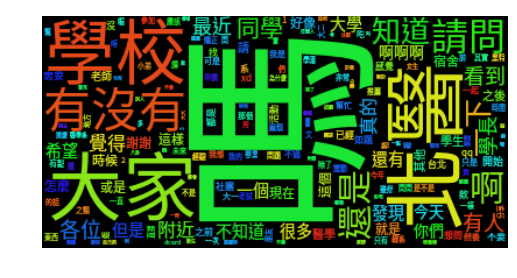

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='NotoSansCJKtc-Regular.otf').fit_words(PCont_All)
#print("Samples in female title: " + str(len(lstPCont_All)))
#print(PCont_All[0:100])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### 以性別看Token的 Term Frequency (by Title & Post Content)

In [55]:
#dfMain.loc[:5,["PID","Poster","Gender","Title","PDate","PCont",'PLike','PReply']]
#dfDetail.loc[:5,["oID", 'PID', 'CIDX', 'Poster', 'Gender', 'CDate', 'Cmt', 'CLike','Date', 'Time']]

lstTitle_F = list(dfMain.loc[dfMain["Gender"] == "f"]["Title"])
lstPCont_F = list(dfMain.loc[dfMain["Gender"] == "f"]["PCont"]) 
lstTitle_M = list(dfMain.loc[dfMain["Gender"] == "m"]["Title"])
lstPCont_M = list(dfMain.loc[dfMain["Gender"] == "m"]["PCont"])

In [63]:
import operator
Title_F = {}
PCont_F = {}
Title_M = {}
PCont_M = {}

for content in lstTitle_F:
    for word in content.split():
        if word in Title_F.keys():
            Title_F[word] += 1  # 重複的 +1
        else:
            Title_F[word] = 1 # 第一次出現的給 1
Title_F = sorted(Title_F.items(), key=operator.itemgetter(1), reverse=True)
      
for content in lstPCont_F:
    for word in content.split():
        if word in PCont_F.keys():
            PCont_F[word] += 1
        else:
            PCont_F[word] = 1
PCont_F = sorted(PCont_F.items(), key=operator.itemgetter(1), reverse=True)
 
for content in lstTitle_M:
    for word in content.split():
        if word in Title_M.keys():
            Title_M[word] += 1
        else:
            Title_M[word] = 1
Title_M = sorted(Title_M.items(), key=operator.itemgetter(1), reverse=True)
         
for content in lstPCont_M:
    for word in content.split():
        if word in PCont_M.keys():
            PCont_M[word] += 1
        else:
            PCont_M[word] = 1
PCont_M = sorted(PCont_M.items(), key=operator.itemgetter(1), reverse=True)


In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Samples in female title: 165
[('北醫', 19), ('學校', 18), ('附近', 15), ('關於', 12), ('問', 11), ('有沒有', 6), ('嗎', 6), ('請問', 5), ('大家', 5), ('黑特', 4), ('服學', 3), ('請', 3), ('學期', 3), ('社', 3), ('大一', 3), ('修改', 3), ('推薦', 3), ('宿舍', 3), ('原野', 3), ('成績', 3), ('學校裡', 2), ('一個', 2), ('社團', 2), ('的掛', 2), ('矯正', 2), ('上課', 2), ('想知道', 2), ('健身房', 2), ('熱舞社', 2), ('網路', 2), ('英文', 2), ('校內', 2), ('開學', 2), ('不知道', 2), ('排名', 2), ('囉', 2), ('租屋', 2), ('地方', 2), ('暑修', 2), ('有人', 2), ('選課', 2), ('忘記', 2), ('重修', 2), ('dcard', 2), ('衣服', 2), ('檢定', 2), ('系', 2), ('抽到', 2), ('牙醫', 2), ('前', 2)]


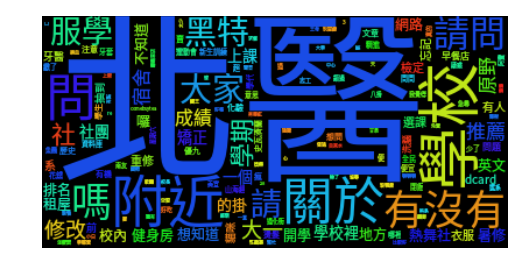

In [67]:
wordcloud = WordCloud(font_path='NotoSansCJKtc-Regular.otf').fit_words(Title_F)
print("Samples in female title: " + str(len(lstTitle_F)))
print(Title_F[0:50])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Samples in female post content: 165
[('大家', 74), ('嗎', 74), ('北醫', 67), ('學校', 54), ('有沒有', 37), ('一下', 35), ('請問', 34), ('知道', 32), ('有人', 27), ('還是', 26), ('真的', 25), ('附近', 25), ('不知道', 24), ('啊', 23), ('覺得', 23), ('最近', 21), ('學長', 21), ('但是', 20), ('一個', 20), ('各位', 20), ('看到', 20), ('希望', 19), ('還有', 19), ('請', 18), ('同學', 17), ('謝謝', 17), ('宿舍', 16), ('發現', 15), ('或是', 15), ('推薦', 14), ('不要', 14), ('好像', 14), ('男', 14), ('今天', 14), ('大學', 14), ('醫學', 14), ('這個', 14), ('這樣', 14), ('現在', 14), ('怎麼', 13), ('吃', 12), ('就是', 12), ('矯正', 12), ('有點', 12), ('需要', 12), ('很多', 12), ('之後', 12), ('時候', 12), ('牠', 12), ('感覺', 11)]


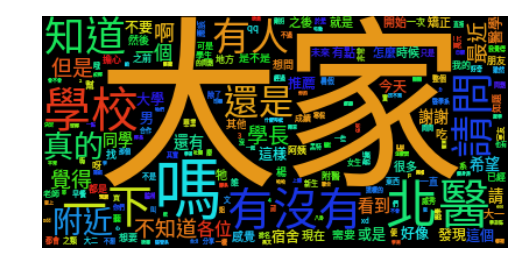

In [68]:
wordcloud = WordCloud(font_path='NotoSansCJKtc-Regular.otf').fit_words(PCont_F)
print("Samples in female post content: " + str(len(lstPCont_F)))
print(PCont_F[0:50])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Samples in male title: 199
[('北醫', 37), ('學校', 13), ('嗎', 8), ('附近', 8), ('問', 7), ('黑特', 7), ('轉系', 7), ('關於', 6), ('大家', 6), ('有沒有', 5), ('宿舍', 5), ('問題', 5), ('社團', 4), ('國考', 4), ('學', 4), ('啊', 4), ('八卦', 3), ('請問', 3), ('畢業', 3), ('中心', 3), ('如何', 3), ('選課', 3), ('的問題', 3), ('美食', 3), ('問卦', 3), ('老師', 3), ('達叔', 3), ('考', 3), ('朋友', 2), ('聖誕節', 2), ('詢問', 2), ('外', 2), ('通識課', 2), ('40', 2), ('走', 2), ('教研', 2), ('大學', 2), ('神經科', 2), ('xd', 2), ('保健', 2), ('的貓', 2), ('學生證', 2), ('b1', 2), ('幹嘛', 2), ('別再', 2), ('wifi', 2), ('打工', 2), ('前棟', 2), ('原野', 2), ('飲料', 2)]


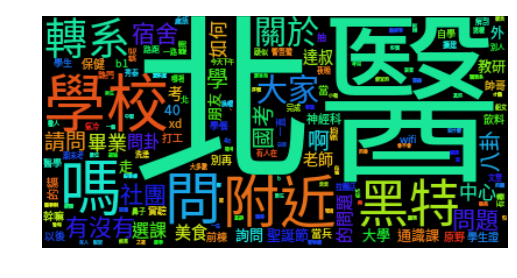

In [69]:
wordcloud = WordCloud(font_path='NotoSansCJKtc-Regular.otf').fit_words(Title_M)
print("Samples in male title: " + str(len(lstTitle_M)))
print(Title_M[0:50])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Samples in male post content: 199
[('嗎', 81), ('北醫', 71), ('大家', 54), ('有沒有', 46), ('啊', 39), ('還是', 38), ('同學', 37), ('請問', 34), ('學校', 32), ('啊啊啊', 29), ('看到', 29), ('各位', 27), ('最近', 25), ('知道', 25), ('你們', 24), ('學長', 24), ('一下', 21), ('有人', 20), ('覺得', 20), ('很多', 20), ('一個', 19), ('大學', 19), ('希望', 18), ('社團', 18), ('活動', 18), ('就是', 17), ('真的', 16), ('1', 16), ('附近', 16), ('但是', 16), ('發現', 16), ('沒', 16), ('今天', 16), ('還有', 16), ('不知道', 16), ('學生', 16), ('老師', 15), ('這個', 15), ('小弟', 14), ('其他', 14), ('時候', 14), ('欸', 14), ('幫忙', 14), ('開始', 13), ('我想', 13), ('系', 13), ('qq', 13), ('一起', 13), ('或是', 13), ('我是', 13)]


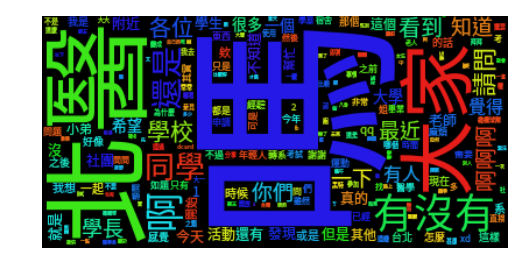

In [71]:
wordcloud = WordCloud(font_path='NotoSansCJKtc-Regular.otf').fit_words(PCont_M)
print("Samples in male post content: " + str(len(lstPCont_M)))
print(PCont_M[0:50])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
dfMain.loc[dfMain["Gender"].isin(['f','m']),["PID","Gender","Title","PCont",'PLike','PReply']].sort_values(['PLike'], ascending=[False])

,PID,Gender,Title,PCont,PLike,PReply
132,225230646,f,北醫 dcard,如題 北醫 dcard 是不是 很少 啊 還是 不點 進來 校版 想要 跟風 做個 統計 有...,271,12
84,225600301,f,請 大家 注意 附醫前 計程車,大家 小心 附醫前 排班 車頂 掛 吳興 自營 大型 計程車 梁姓 司機 言行舉止 非常 惡...,152,18
246,224073308,m,水旺 爺爺 一路 走,httpblogtmuedutwtmubt012347htmlmore 北醫 創校 胡水旺 ...,128,0
271,99095355,m,當 別人 聽到 讀 北醫,個人 遇過 幾種 情況 1 醫學系 這麼 厲害 大多數 長輩 2 那個 信義區 那個 嗎 綽...,122,18
9,226215427,f,全民 一起 瘋 解剖 耶依,最近 讀 解剖 真 ㄉ 敲 崩潰 ㄌ 物化 發現 鬼 我還是 乖乖 背 骨頭 肌肉 神經 先...,119,11
321,732576,m,飲料 杯 猜謎 跟風 北醫 梗,一如往常 搭 小巴 7 市府 捷運站 出發 傳來 熟悉 報站 即將 抵達 然後 突然 接話 ...,111,9
185,224749610,m,學弟妹 別再 白目,最近 看到 許多 可愛的 大一 懵懵懂懂 的問 這個 問 那個 覺得 真 可愛 屁 白目 死...,90,17
300,944714,f,自學 新 警衛,昨晚 經過 自學 專注 目光 霸氣 身影 俘虜 愛芙蘿黛蒂,88,23
366,248889,f,驕傲 我是 醫管系,我覺得 醫管系 很好 讀到 現在 發現 醫管系 很好 以往 只是 聽到 醫管系 廢 冗 很沒...,85,16
325,705263,f,新生盃 結束 校園,下圖 唉 最近 超多 輪椅 石膏 快要 附醫 來的 伯伯 配外傭 分不清楚 惹 雖然 醫院 ...,82,1


In [23]:
#欠三張圖...: 1. PLike 2.PReply 3.迴文發文時間
plt.figure();
dfMain['PLike'].plot(kind='bar',figsize=(10, 10), title='PLike')


# 不分性別狀態下，從發文中找類似的發文者! (Similarity)
    相似度(看按讚多的和回文多的相似度)
	最多按讚主文
	最多回文主文


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

dfMain = pd.read_csv('MainPost_tokenize.csv', encoding = 'utf-8')
dfMain=dfMain.rename(columns = {'\ufeffPID':'PID'})
dfDetail = pd.read_csv('DetailContent_tokenize.csv', encoding = 'utf-8')
dfDetail=dfDetail.rename(columns = {'\ufeffoID':'oID'})

In [8]:
#系統發文者不算需過濾掉，重新製作daframe 的 index
dfMain2 = dfMain.loc[dfMain["Gender"].isin(['f','m']),["PID","PDate","Gender","Title","PCont",'PLike','PReply']]
dfMain2 = dfMain2.reset_index(drop=True)

In [26]:
dfMain2.loc[dfMain2["Gender"].isin(['f','m']),["PID","Gender","Title","PCont",'PLike','PReply']].sort_values(['PReply'], ascending=[False])

,PID,Gender,Title,PCont,PLike,PReply
361,23673,f,統計 一下 大家 來自 哪個 系,突然 想知道 大家 都是 系所 問 一下,2,93
334,166632,m,有沒有 北醫 帥哥 很多的 八卦,最近 覺得 走在 路上 都可以 看到 好多 帥哥 啊 灑花 連上 網球 課 好多 鮮肉 都想...,26,83
301,509453,f,人生地不熟,原 po 最近 剛到 北醫 問問 各位 學長 姐 北醫 有沒有 好吃 好玩的 推薦 一下 還...,14,63
363,22678,f,北醫 故事,入學 以前 查遍 北醫 阿飄 故事 好像 沒什麼 耶 除了 一點 溫馨的 大體 故事 跪求 ...,7,52
300,514471,f,請問 學長 姐 有關於 楓杏,剛剛 有看到 另外 一篇 文 底下 留言 提到 楓杏想 請問 各位 學長 姐們 楓杏是 樣 ...,8,49
242,1143192,f,大家 排名 學校 周邊 午餐,到了 開學 時候 每次 開學 痛苦 的事情 莫過於 中午 吃 尤其 我這種 三老 屁股 來說...,22,41
303,496416,f,抽卡 一直 抽到 北醫 xd,小妹 我是 大一 新生 剛辦 迪卡滿 一個 禮拜 抽 7 張卡 居然有 5 張是 北醫 天啊...,31,39
356,42771,f,有沒有 學校裡 帥哥 八掛,如題 請 大家 提供 北醫 帥哥 掛要 真的 帥 喔 別鬧 覺得 空虛,9,39
119,224931502,f,黑特 北醫,今天下午 出現 一連串 黑特文 黑特 北醫 30 版上 內容 關於 現任 校隊 教練 隊長 ...,64,39
362,22851,m,不知道 大家 首 抽 如何,話說 北醫 也是 兩天 加入 dcard 雖說 小弟 還沒有 上手 想說 首 抽 不管怎樣 ...,1,37


In [28]:
%%time
from collections import OrderedDict
dict_tfidf = {}

def getTFIDF():
    lstTokens = []
    dictDFbyTerm = {}
    #dict_tfidf = {}

    for index, row in dfMain2.iterrows():
        #1. Get all tokens
        content = row["PCont"]   
        for tokens in content.split():
            if tokens.strip().lower() not in lstTokens:
                lstTokens.append(tokens.strip())
    
    tf_v = np.zeros([len(lstTokens),1])
    for index, row in dfMain2.iterrows():
        content = row["PCont"]
        #2. Get TF list
        for term in content.split():
            tf_v[lstTokens.index(term),0] += content.split().count(term)

        #3. Get DF dict
        terms = list(OrderedDict.fromkeys(content.split())) # Remove duplicate terms in the same doc
        for word in terms:
            if word in dictDFbyTerm:
                dictDFbyTerm[word] += 1
            else:
                dictDFbyTerm[word] = 1

    #4. Get iDF
    df_v = np.zeros([len(lstTokens),1])
    idf_v = np.zeros([len(lstTokens),1])

    for key in dictDFbyTerm:
        df_v[lstTokens.index(key),0] = dictDFbyTerm[key]
        idf_v[lstTokens.index(key),0] = np.log10(len(dfMain2)/dictDFbyTerm[key])

    #5. Get TF-iDF (weight)
    weight_v = np.zeros([len(lstTokens),1])
    weight_v = tf_v * idf_v

    #6.Assign each weight vector to the belong documents
    for index, row in dfMain2.iterrows():
        tfidf_v = np.zeros([len(lstTokens),1])
        content = row["PCont"]
        for term in content.split():
            tfidf_v[lstTokens.index(term)] = weight_v[lstTokens.index(term)]
            
        dict_tfidf[index] = tfidf_v #依照Doc的 index塞 weights vector

def getSimilarity(ref_ID):
    dictSimilarity = {}
    for i, vec in enumerate(dict_tfidf):  
        dictSimilarity[i] = (np.dot(dict_tfidf[ref_ID].T,dict_tfidf[i])[0][0]) / (LA.norm(dict_tfidf[ref_ID]) * LA.norm(dict_tfidf[i]))
    return dictSimilarity

Wall time: 0 ns


In [17]:
# 下個index區間看看資料內容
dfMain2.loc[235:245,["Title","PCont"]]
#dfMain2.loc[dfMain2["PReply"]>30,['Title','PCont','PLike','PReply']]

,Title,PCont
235,前 幾天 出現 7 前 黑狗,請問 有沒有 知道 平安 嗎 是不是 好心人 帶 回家 這幾天 都下 大雨 完全 不見 他的...
236,問 大家 選系 是為了 興趣 還是 薪水,最近 一直在 思考 一個 問題 大家 考上 自己的 系 或是 選擇 現在的 系是 興趣 還是...
237,轉系 規定,代 po 要轉 藥學 門檻 學年 總平均 80 分 還是 上下學 期 平均 都要 80 分 ...
238,關於 學校 健身房,最近 開始 學校 健身房 不過 對於 跑步機 使用 不是 很清楚 想要 跑 的話 先在 櫃檯...
239,開學 除了 上課,唉 開學 兩週 除了 上課 還有 活動 值得 參加 嗎 我不 想要 繼續 廢 下去 大家 新...
240,北醫 附近 讀書 地方,求 北醫 附近 讀書 飲點 東西 坐 很久 地方 星巴克 除外 已經 去膩 大一 小朋友
241,求救 學生證 掉了,請問 我要 先去 那個 處室 辦 還有 補辦 學生證 要錢 嗎
242,大家 排名 學校 周邊 午餐,到了 開學 時候 每次 開學 痛苦 的事情 莫過於 中午 吃 尤其 我這種 三老 屁股 來說...
243,遜色 北醫 營隊 文化,安安 各位 大大 水水 最近 成大 版 非常 熱鬧 討論 關於 救國團 以來 流傳 許久 營...
244,傳說中 轉系 秘笈,聽說 北醫 校 內有 販售 神秘的 轉系 秘笈 但是 是誰 販售 阿要 透過 管道 購買 啊


In [30]:
#%%time
#1.先將tf-idf計算與指派向量給 doc
#2.給予Idex計算相似度
#3.將回傳的Index列出文章內容 閱覽

getTFIDF()
Q = 88 #輸入想知道的文章Index
#PLike 最多的index : 88
#PReply 最多的 index: 361
dictSim = getSimilarity(Q)

dfSim = pd.DataFrame.from_dict(data = dictSim, orient='index') #將Dict轉成dataframe

print(dfSim.loc[dfSim[0]>0.7,:])
dfMain2.loc[dfSim.loc[dfSim[0]>0.7,:].index,:] #篩選相似度高的文章作output

            0
88   1.000000
190  0.741840
293  0.728627


,PID,PDate,Gender,Title,PCont,PLike,PReply
88,225230646,2016/11/20,f,北醫 dcard,如題 北醫 dcard 是不是 很少 啊 還是 不點 進來 校版 想要 跟風 做個 統計 有...,271,12
190,224185342,2016/6/12,m,祝 大家 all 趴 暑假 幹嘛,誠心 祝福 每個 北醫 同學們 學期 都能 all 趴 希望 老天 看在 如此 善良 份 a...,35,9
293,576209,2015/9/20,f,有沒有 連續 10 天 抽到 北醫 的掛,已經 連續 四天 抽到 北醫 而且 我的 另外 兩個 室友 也都 這樣 xddd 大家 覺得...,41,23


In [ ]:
#dfMain2.loc[dfMain2["PReply"]>30,['PDate','Title','PCont','PLike','PReply']]

# 用回文的資料集 當Train Data 去預測主文章中的發文者性別

    --分別先用自己的Naive
    --再用sklearn的Naive驗證

In [1]:
import pandas as pd

dfMain = pd.read_csv('MainPost_tokenize.csv', encoding = 'utf-8')
dfMain=dfMain.rename(columns = {'\ufeffPID':'PID'})
dfDetail = pd.read_csv('DetailContent_tokenize.csv', encoding = 'utf-8')
dfDetail=dfDetail.rename(columns = {'\ufeffoID':'oID'})

In [34]:
dfDetail.loc[dfDetail["oID"] == "226260030-8",:]
#dfDetail.loc[dfDetail["Cmt"].notnull(),:]

,oID,PID,CIDX,Poster,Gender,CDate,Cmt,CLike,Date,Time
8,226260030-8,226260030,8,臺北醫學大學,m,4月26日 16:17,NaN,0,2017/4/26,16:17


In [9]:
dfDetail2 = dfDetail.loc[dfDetail["Gender"].isin(['f','m']) & dfDetail["Cmt"].notnull(),["PID",'CIDX',"Gender","Date","Cmt",'CLike']]
dfDetail2 = dfDetail2.reset_index(drop=True)

dfMain2 = dfMain.loc[dfMain["Gender"].isin(['f','m']),["PID","PDate","Gender","Title","PCont",'PLike','PReply']]
dfMain2 = dfMain2.reset_index(drop=True)
print(len(dfDetail2)) #用 Detail 的 當Train Data
#len(dfMain2) #用Main 當Test Data
dfDetail2.loc[0:5,:]

3793


,PID,CIDX,Gender,Date,Cmt,CLike
0,226290629,1,m,2017/4/30,匆匆 四年 過 社團 無成 成績 不行 工作 無 著落,11
1,226260030,1,m,2017/4/25,期中考 成績單 數字 一樣 耶,27
2,226260030,2,m,2017/4/25,是說 在座 各位 都是 垃色,11
3,226260030,4,f,2017/4/25,校板 終於 變廢 嗎,10
4,226260030,5,f,2017/4/26,超廢 欸 哈哈哈 哈哈哈,4
5,226260030,6,m,2017/4/26,蘋果 合群 裡面 黃色,2


In [3]:
# 進行回覆文章的 Token 蒐集
from collections import Counter

lstTrainTag = []
lstTrainDocs = []
lstTrainTokens = []
TrainTokens = Counter()

for index, row in dfDetail2.iterrows():
    #Get Content & all tokens list
    content = row["Cmt"]
    #print(content)
    for tokens in content.split():
        content += tokens.strip().lower() + " "
        TrainTokens[tokens.strip().lower()] += 1
    
    lstTrainDocs.append(content.strip())
    
    #Get topic tag
    lstTrainTag.append(row["Gender"]) #依照文檔讀取每一列的文章斷詞

lstTrainTokens = list(TrainTokens.keys())

In [4]:
def get_TFDocToken(docs):
    mx_TF_DocToken = np.zeros([len(docs),len(lstTrainTokens)])
    for i, doc in enumerate(docs):
        for term in doc.split():
            if term in lstTrainTokens:
                mx_TF_DocToken[i,lstTrainTokens.index(term)] = doc.split().count(term)

    return mx_TF_DocToken

In [5]:
%%time
#將訓練資料集中的文章與Token做成Matirx
mx_TrainDocToken = get_TFDocToken(lstTrainDocs)

Wall time: 35.1 s


In [6]:
len(mx_TrainDocToken[1])

11129

In [7]:
%%time
#fit 訓練資料集中的機率幾算
numTrainDocs = len(mx_TrainDocToken)  #總文章數.  
numWords = len(mx_TrainDocToken[1])   #總Token數
percentFemale = lstTrainTag.count("f") / float(len(lstTrainDocs)) #Female類文章所佔量
Male_v_Num = np.ones(len(mx_TrainDocToken[1])) #avoid zero probability
Female_v_Num = np.ones(len(mx_TrainDocToken[1])) 
MaleTokens = len(lstTrainTokens) #all tokens Vector size 初始值給vector size
FemaleTokens = len(lstTrainTokens) #all tookens Vector size                  
for i, docs in enumerate(lstTrainDocs):
    if lstTrainTag[i] == "f":  
        Female_v_Num += mx_TrainDocToken[i]  #在Female類文章的所有Token的出現次數
        FemaleTokens += sum(mx_TrainDocToken[i]) #所有Female文章的總字數
    else:  
        Male_v_Num += mx_TrainDocToken[i]
        MaleTokens += sum(mx_TrainDocToken[i])
        
FemaleVector = np.log(Female_v_Num / FemaleTokens)  # 計算 Female 中每個 token 出現的 Probability
MaleVector = np.log(Male_v_Num / MaleTokens)        # 計算 Male 中每個 token 出現的 Probability  

Wall time: 4.65 s


In [10]:
#進行測試資料回文蒐集
lstTestDocs = []

for index, row in dfMain2.iterrows():
    #Get content
    content = row["PCont"]   
    for tokens in content.split():
        content += tokens.strip().lower() + " "    
    lstTestDocs.append(content.strip())

In [11]:
#利用訓練資料預測測試資料
def MultinomialClassify(index,testVector,FVector,MVector,pFemale):
    lstCompare = [] 
    lstCompare.append(index)
    Female = sum(testVector * FVector) + np.log(pFemale)  
    Male = sum(testVector * MVector) + np.log(1 - pFemale)
    lstCompare.append(Female)
    lstCompare.append(Male)
    #print(lstCompare)
    if Female > Male:
        lstCompare.append("female")
    else:
        lstCompare.append("male")
        
    return lstCompare

In [12]:
%%time
mx_testDocToken = get_TFDocToken(lstTestDocs)

Wall time: 7.71 s


In [13]:
%%time
#print(len(mx_testDocToken))
import pandas as pd
lblColumn = ["Index","Female_P","Male_P","Classified_Tag"]
dfResult = pd.DataFrame(columns = lblColumn)

for i in range(len(mx_testDocToken)):
    result = MultinomialClassify(str(i),mx_testDocToken[i],FemaleVector,MaleVector,percentFemale)
    #print(result)
    dfResult.loc[dfResult.shape[0]] = result
    #print(str(i+3501) + ";" + result)

Wall time: 1.76 s


In [14]:
dfResult = dfResult.join(dfMain2.loc[:,["PID","Gender"]])

In [15]:
len(dfResult)

364

In [16]:
dfResult.loc[20:30,["Index","Classified_Tag","PID","Gender"]]

,Index,Classified_Tag,PID,Gender
20,20,female,226052071,f
21,21,male,226050193,f
22,22,female,226038768,f
23,23,male,226029680,m
24,24,female,226020865,f
25,25,female,226019629,m
26,26,female,225992834,m
27,27,female,225940676,f
28,28,female,225906407,f
29,29,male,225900712,m


In [17]:
#欠 ROC、F1、Precision-Recall 圖形
#dfResult.loc[dfResult["Classified_Tag"] == "male" & dfResult["Gender"] == "m",["Classified_Tag","Gender"]]
#dfResult.to_csv("FinalPrj_Result.csv")
print(len(dfResult))
dfPR = pd.DataFrame(columns = ["Predict_Male","Predict_Female"],index = ['True_Male','True_Female'])
dfPR.ix[0,0] = 117
dfPR.ix[0,1] = 82
dfPR.ix[1,0] = 74
dfPR.ix[1,1] = 91
dfPR

Precision = 117/(117+74)
Recall = 117/(117+82)
F1measure = (2*Precision*Recall) / (Precision+Recall)
Accuracy = (117+91) / len(dfResult)

print("Precision: " + str(Precision))
print("Recall: "    + str(Recall))
print("F1measure : " + str(F1measure))
print("Accuracy : " + str(Accuracy))
dfPR

364
Precision: 0.612565445026178
Recall: 0.5879396984924623
F1measure : 0.6000000000000001
Accuracy : 0.5714285714285714


,Predict_Male,Predict_Female
True_Male,117,82
True_Female,74,91


In [ ]:
#http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(dfDetail2["Cmt"].values)
X_train_counts.shape #這裡的10149和我自己統計的Token:11129不同

(3793, 10149)

In [33]:
#sklearn 官網上的naive_bayes試做
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB

tfidf_transformer = TfidfTransformer(use_idf=False)
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#X_train_tfidf.shape
tf_transformer = tfidf_transformer.fit_transform(X_train_counts)

#clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)
clf = MultinomialNB().fit(tf_transformer , dfDetail2["Gender"].values)

#docs_new = ['God is love', 'OpenGL on the GPU is fast']
#X_new_counts = count_vect.transform(docs_new)
#X_new_tfidf = tfidf_transformer.transform(X_new_counts)
X_new_counts = count_vect.transform(dfMain2["PCont"])
X_new_tfidf = tfidf_transformer.fit_transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

#for doc, category in zip(docs_new, predicted):
#    print('%r => %s' % (doc, twenty_train.target_names[category]))


#'God is love' => soc.religion.christian
#'OpenGL on the GPU is fast' => comp.graphics

#from sklearn.pipeline import Pipeline
#text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
#text_clf = text_clf.fit(twenty_train.data, twenty_train.target)


In [34]:
lstPredResult =list(predicted)
dfResult = pd.DataFrame(lstPredResult)
dfResult = dfResult.rename(columns = {0:"Classified_Tag"})
dfResult = dfResult.join(dfMain2.loc[:,["PID","Gender"]])
#dfResult.head()
print('Predicted F & True F: ' + str(len(dfResult.loc[(dfResult["Classified_Tag"] == 'f') & (dfResult["Gender"] == 'f'),:])))
print('Predicted F & True M: ' + str(len(dfResult.loc[(dfResult["Classified_Tag"] == 'f') & (dfResult["Gender"] == 'm'),:])))
print('Predicted M & True M: ' + str(len(dfResult.loc[(dfResult["Classified_Tag"] == 'm') & (dfResult["Gender"] == 'm'),:])))
print('Predicted M & True F: ' + str(len(dfResult.loc[(dfResult["Classified_Tag"] == 'm') & (dfResult["Gender"] == 'f'),:])))

Predicted F & True F: 34
Predicted F & True M: 26
Predicted M & True M: 173
Predicted M & True F: 131


In [38]:
print(metrics.classification_report(dfMain2["Gender"].values, predicted))
print("Accuracy:" + str((34+173)/len(dfResult)))

             precision    recall  f1-score   support

          f       0.57      0.21      0.30       165
          m       0.57      0.87      0.69       199

avg / total       0.57      0.57      0.51       364

Accuracy:0.5686813186813187


In [44]:
#http://stackoverflow.com/questions/10526579/use-scikit-learn-to-classify-into-multiple-categories
#使用SVM的範例
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier

X_train = dfDetail2["Cmt"].values
y_train = dfDetail2["Gender"].values

X_test = dfMain2["PCont"].values

classifier = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer(use_idf=False)), #use_idf=False 是要計算TF 還是 TF-IDF的差異
    ('clf', OneVsRestClassifier(LinearSVC()))])
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
lstPredResult =list(predicted)

In [45]:
dfResult = pd.DataFrame(lstPredResult)
dfResult = dfResult.rename(columns = {0:"Classified_Tag"})
dfResult = dfResult.join(dfMain2.loc[:,["PID","Gender"]])

In [46]:
#dfResult.head()
print('Predicted F & True F: ' + str(len(dfResult.loc[(dfResult["Classified_Tag"] == 'f') & (dfResult["Gender"] == 'f'),:])))
print('Predicted F & True M: ' + str(len(dfResult.loc[(dfResult["Classified_Tag"] == 'f') & (dfResult["Gender"] == 'm'),:])))
print('Predicted M & True M: ' + str(len(dfResult.loc[(dfResult["Classified_Tag"] == 'm') & (dfResult["Gender"] == 'm'),:])))
print('Predicted M & True F: ' + str(len(dfResult.loc[(dfResult["Classified_Tag"] == 'm') & (dfResult["Gender"] == 'f'),:])))

Predicted F & True F: 90
Predicted F & True M: 97
Predicted M & True M: 102
Predicted M & True F: 75


In [47]:
print(metrics.classification_report(dfMain2["Gender"].values, predicted))
print("Accuracy:" + str((90+102)/len(dfResult)))

             precision    recall  f1-score   support

          f       0.48      0.55      0.51       165
          m       0.58      0.51      0.54       199

avg / total       0.53      0.53      0.53       364

Accuracy:0.5274725274725275


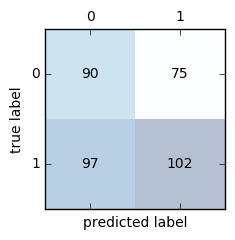

In [42]:
from sklearn import metrics
confmat = metrics.confusion_matrix(dfMain2["Gender"].values, predicted)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

# 情緒與正負向分析 (暫略!!!)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

dfMain = pd.read_csv('MainPost_tokenize.csv', encoding = 'utf-8')
dfMain = dfMain.rename(columns = {'\ufeffPID':'PID'})
dfDetail = pd.read_csv('DetailContent_tokenize.csv', encoding = 'utf-8')
dfDetail = dfDetail.rename(columns = {'\ufeffoID':'oID'})

#讀取情緒字典
tmp = open('NTUSD_traditional/NTUSD_positive_unicode.txt','r',encoding = 'utf-8')
lstpositive = list(tmp.read().split('\n'))
tmp.close()

tmp = open('NTUSD_traditional/NTUSD_negative_unicode.txt','r',encoding = 'utf-8')
lstnegative = list(tmp.read().split('\n'))
tmp.close()

In [18]:
dfMain3 = dfMain.loc[dfMain["Gender"].isin(['f','m']),["PID","PDate","Gender","Title","PCont",'PLike','PReply']]
dfMain3 = dfMain3.reset_index(drop=True)
#avgReply=dfMain3["PReply"].sum()/len(dfMain3) #平均回文 = 11.28
dfMain3.loc[dfMain3["PReply"] >= 25 ,['Title','PCont','PLike','PReply']]

,Title,PCont,PLike,PReply
14,求綠衣 八卦,有沒有 1 天 就要 7200 元 八卦 顆顆,19,27
29,創立 新 社團,各位 我想 創立 社團 但是 擔心 人要 參加 qq 請問 大家 有沒有 對於 辯論 興趣 ...,25,29
62,關於 藥學系 新共筆 制度,雖然 我是 一個 幹部 卻不 知道 究竟 怎麼樣 qq 感覺 上面 學長 姊 還有 爭議 無...,9,31
96,崩潰 惹,阿阿阿 啊啊啊 啊啊啊 啊啊啊 啊啊啊 啊啊啊 啊啊啊 啊啊啊 啊啊啊 啊啊啊 啊啊啊 啊啊...,39,32
109,北 醫學 生必 吃 美食,問問看 學校 附近 好吃 必吃 餐廳 小吃 非 連鎖 餐廳 價位 其次,15,29
119,黑特 北醫,今天下午 出現 一連串 黑特文 黑特 北醫 30 版上 內容 關於 現任 校隊 教練 隊長 ...,64,39
140,社團,我是 大一 新生 班有 兩個 女生 一個 超想 加國 標社 那個 積極的 態度 跟我說 其實...,20,28
173,請問 北醫 甲甲 都在,出軌 北醫 找不到 特別 哪個 系 那個 社團 嗎,7,36
220,北醫 真的 校門 口 嗎,北醫 校門 很多 可能 之前 聽 同學 說過 有些人 走後門 讀 醫學系 但是 當時 抱著 ...,17,28
226,綽號,剛剛 開了 fb 滑 一滑 剛好 看到 有人在 fb 關於 寫上 北醫 楊祐寧 再看看 照片...,7,32


In [44]:
lstSelectPostID = list(dfMain3.loc[dfMain3["PReply"] >= 25 ,"PID"])
lstSelectPostID 
dfDetail3 = dfDetail.loc[dfDetail["PID"].isin(lstSelectPostID) & dfDetail["Cmt"].notnull() & dfDetail["Gender"].isin(['f','m']),["PID",'CIDX',"Gender","Date","Cmt"]]

In [46]:
for index, row in dfDetail3.iterrows():
    #Get content
    print( str(row["PID"]) + "-" + str(row['CIDX']) + " : " + str(len(row["Cmt"])))

#回文長度值得分析的PID:225376349、225153325、224931502、808244

226085179-1 : 9
226085179-2 : 16
226085179-3 : 10
226085179-4 : 9
226085179-6 : 14
226085179-7 : 2
226085179-8 : 11
226085179-9 : 10
226085179-10 : 100
226085179-11 : 131
226085179-12 : 69
226085179-13 : 41
226085179-15 : 87
226085179-16 : 57
226085179-17 : 79
226085179-18 : 43
226085179-20 : 54
226085179-21 : 218
226085179-22 : 12
226085179-23 : 138
226085179-24 : 27
226085179-25 : 21
226085179-26 : 24
226085179-27 : 23
225900712-1 : 15
225900712-2 : 50
225900712-4 : 11
225900712-5 : 92
225900712-6 : 12
225900712-7 : 38
225900712-8 : 46
225900712-9 : 21
225900712-10 : 8
225900712-11 : 124
225900712-12 : 111
225900712-13 : 44
225900712-14 : 138
225900712-15 : 22
225900712-16 : 23
225900712-17 : 195
225900712-18 : 26
225900712-19 : 73
225900712-21 : 101
225900712-22 : 67
225900712-23 : 42
225900712-24 : 52
225900712-25 : 37
225900712-26 : 30
225900712-27 : 27
225900712-28 : 25
225900712-29 : 52
225376349-1 : 23
225376349-2 : 15
225376349-3 : 34
225376349-4 : 58
225376349-5 : 16
22537634

In [55]:
dfDetail4 = dfDetail3.loc[dfDetail3["PID"] == 225376349,:]
#dfDetail4 = dfDetail4.reset_index(drop=True)
dfDetail4.loc[581:586,:]

,PID,CIDX,Gender,Date,Cmt
581,225376349,1,m,2016/12/13,就有 某些 自以為 很會 共筆 搞成 這樣 阿
582,225376349,2,m,2016/12/13,邊緣 沒 跟到 qq 求 八卦
583,225376349,3,f,2016/12/13,不喜歡 之前 明 明說 繳系費 就可以看 共筆 倉庫 現在 卻要 印
584,225376349,4,m,2016/12/13,其實 就是 有些人 懶 佔便宜 這樣 而已 沒什麼 八卦 孩子 還是 趁機 多 唸點 書 社...
585,225376349,5,f,2016/12/13,學學 保健 根本 共筆 啊 哈哈
586,225376349,6,f,2016/12/13,學妹 系上 事 直接 問系 相關 幹部 或是 相關的 學長 姐 用不著 搞的 全校 知道 系...


In [60]:
lstPNTokens = []
for index, row in dfDetail4.iterrows():
    #1. Get all tokens
    content = row["Cmt"]   
    for tokens in content.split():
        if tokens.strip().lower() not in lstPNTokens:
            lstPNTokens.append(tokens.strip())

print(len(lstpositive))#2813
print(len(lstnegative))#8277
postive_v = np.zeros([len(lstpositive),1])
negative_v = np.zeros([len(lstnegative),1])
for i, token in enumerate(lstPNTokens):
    if token in lstpositive:
        postive_v[lstpositive.index(token),0] += 1
    elif token in lstnegative:
        negative_v[lstnegative.index(token),0] += 1

2813
8277


In [61]:
p = sum(postive_v)
n= sum(negative_v)

In [65]:
print(p)
print(n)

[ 42.]
[ 46.]
